In [1]:
import pandas as pd

In [14]:
df1 = pd.read_csv('https://docs.google.com/spreadsheets/d/1TuMWCn2c_a3SmKGCgWiPdx-3XH_trIYd8Nfjg9WkXnM/export?gid=0&format=csv', quotechar="'")
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/1uF_So7Zd2QLNku3Q_grcYIBbsy5LHfy_QbTIGkSbyIU/export?gid=0&format=csv', quotechar="'")

In [3]:
df2

,"""Country_code",Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($,Cost Per Month - Standard ($),"Cost Per Month - Premium ($)"""
0,"""ar",Argentina,4760,3154,1606,3.74,6.30,"9.26"""
1,"""au",Australia,6114,4050,2064,7.84,12.12,"16.39"""
2,"""at",Austria,5640,3779,1861,9.03,14.67,"20.32"""
3,"""be",Belgium,4990,3374,1616,10.16,15.24,"20.32"""
4,"""bo",Bolivia,4991,3155,1836,7.99,10.99,"13.99"""
...,...,...,...,...,...,...,...,...
60,"""ua",Ukraine,5336,3261,2075,5.64,8.46,"11.29"""
61,"""gb",United Kingdom,6643,4551,2092,7.91,13.20,"18.48"""
62,"""us",United States,5818,3826,1992,8.99,13.99,"17.99"""
63,"""uy",Uruguay,4989,3154,1835,8.99,12.99,"15.99"""


In [15]:
df2 = df2[['Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies', 'Cost Per Month - Basic ($', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)"']]

In [5]:
columns = ['Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']

In [16]:
df2.columns = columns
df1.columns = columns
df1['Country'] = df1['Country'].map(lambda x: x[1:]) #избавляюсь от " в столбце
df1['Cost Per Month - Premium ($)'] = df1['Cost Per Month - Premium ($)'].map(lambda x: float(x[:-1])) #избавляюсь от " в столбце

In [17]:
df2.loc[:, 'Cost Per Month - Premium ($)'] = df2['Cost Per Month - Premium ($)'].map(lambda x: float(x[:-1]))

In [18]:
df2

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Australia,6114,4050,2064,7.84,12.12,16.39
2,Austria,5640,3779,1861,9.03,14.67,20.32
3,Belgium,4990,3374,1616,10.16,15.24,20.32
4,Bolivia,4991,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...
60,Ukraine,5336,3261,2075,5.64,8.46,11.29
61,United Kingdom,6643,4551,2092,7.91,13.20,18.48
62,United States,5818,3826,1992,8.99,13.99,17.99
63,Uruguay,4989,3154,1835,8.99,12.99,15.99


In [19]:
df = pd.concat([df1, df2], ignore_index=True).drop_duplicates() #проверяю, были ли изменения в цене подписок

In [20]:
df

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74
...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60


## Таблица среднего дохода в зависимости от страны

In [21]:
country_average_salary = pd.DataFrame([['Switzerland', 6273.97],
        ['Singapore', 4156.58],
        ['Luxembourg', 4067.84],
        ['United States', 3602.02],
        ['Australia', 3522.37],
        ['Denmark', 3465.61],
        ['Norway', 3362.80],
        ['Iceland', 3187.19],
        ['Qatar', 3161.48],
        ['Hong Kong', 3014.54],
        ['Netherlands', 2927.36],
        ['United Arab Emirates', 2884.68],
        ['Ireland', 2875.74],
        ['Germany', 2856.37],
        ['Sweden', 2811.14],
        ['Canada', 2753.01],
        ['Israel', 2737.02],
        ['Japan', 2727.68],
        ['United Kingdom', 2703.37],
        ['Finland', 2691.45],
        ['New Zealand', 2675.22],
        ['France', 2536.34],
        ['Belgium', 2351.66],
        ['Austria', 2272.28],
        ['South Korea', 2170.87],
        ['Puerto Rico', 1931.66],
        ['Kuwait', 1883.90],
        ['Saudi Arabia', 1770.17],
        ['Oman', 1734.36],
        ['Italy', 1611.87],
        ['Spain', 1569.81],
        ['Bahrain', 1559.66],
        ['Taiwan', 1430.04],
        ['Cyprus', 1387.40],
        ['South Africa', 1383.17],
        ['Estonia', 1337.54],
        ['Czech Republic', 1328.00],
        ['Malta', 1277.18],
        ['Slovenia', 1276.65],
        ['China', 1069.90],
        ['Lithuania', 1064.47],
        ['Slovakia', 996.63],
        ['Lebanon', 993.70],
        ['Portugal', 957.71],
        ['Poland', 948.35],
        ['Latvia', 940.41],
        ['Croatia', 897.61],
        ['Trinidad And Tobago', 835.16],
        ['Palestine', 830.91],
        ['Greece', 828.18],
        ['Hungary', 820.55],
        ['Malaysia', 800.91],
        ['Costa Rica', 747.41],
        ['Panama', 740.26],
        ['Romania', 661.67],
        ['Bulgaria', 658.98],
        ['Uruguay', 618.82],
        ['Chile', 602.39],
        ['Jamaica', 596.31],
        ['Bosnia And Herzegovina', 575.81],
        ['Jordan', 574.28],
        ['Iraq', 565.44],
        ['Thailand', 552.14],
        ['Mexico', 551.07],
        ['Russia', 541.71],
        ['Montenegro', 530.12],
        ['Serbia', 516.08],
        ['Honduras', 500.93],
        ['Bolivia', 498.06],
        ['Guatemala', 477.26],
        ['Ecuador', 472.62],
        ['Ukraine', 465.37],
        ['Kosovo (Disputed Territory)', 460.89],
        ['India', 459.76],
        ['Vietnam', 458.54],
        ['Morocco', 441.53],
        ['Kenya', 422.12],
        ['Albania', 411.85],
        ['North Macedonia', 405.56],
        ['Armenia', 400.38],
        ['Argentina', 398.14],
        ['Belarus', 396.19],
        ['Peru', 379.44],
        ['Kazakhstan', 378.81],
        ['El Salvador', 373.68],
        ['Turkey', 366.55],
        ['Brazil', 365.28],
        ['Dominican Republic', 334.65],
        ['Azerbaijan', 315.74],
        ['Colombia', 312.37],
        ['Philippines', 309.34],
        ['Bangladesh', 297.74],
        ['Iran', 296.35],
        ['Indonesia', 296.12],
        ['Tunisia', 285.48],
        ['Ghana', 280.96],
        ['Venezuela', 252.50],
        ['Uzbekistan', 247.85],
        ['Algeria', 239.00],
        ['Egypt', 234.93],
        ['Sri Lanka', 234.70],
        ['Nepal', 227.63],
        ['Ethiopia', 199.51],
        ['Pakistan', 195.49],
        ['Nigeria', 183.72],
        ['Uganda', 150.27],
        ['Syria', 67.03],
        ['Czechia', 2313.0],
        ['Gibraltar', 4222.16],
        ['Liechtenstein', 7666.6],
        ['Moldova', 419.0],
        ['Monaco', 4725.48],
        ['Paraguay', 322.0],
        ['San Marino', 2507.62],
        ]
)

In [22]:
country_average_salary.columns = ['Country', 'Average Monthly Net Salary ($)']
country_average_salary

,Country,Average Monthly Net Salary ($)
0,Switzerland,6273.97
1,Singapore,4156.58
2,Luxembourg,4067.84
3,United States,3602.02
4,Australia,3522.37
...,...,...
109,Liechtenstein,7666.60
110,Moldova,419.00
111,Monaco,4725.48
112,Paraguay,322.00


In [23]:
data = pd.merge(df, country_average_salary, how='left')
data = data[['Country', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)', 'Average Monthly Net Salary ($)']]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         65 non-null     object 
 1   Cost Per Month - Basic ($)      65 non-null     float64
 2   Cost Per Month - Standard ($)   65 non-null     float64
 3   Cost Per Month - Premium ($)    65 non-null     float64
 4   Average Monthly Net Salary ($)  65 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.0+ KB


##  График корреляции между средним доходом и ценой подписки

In [25]:
import seaborn as sn
from matplotlib import pyplot as plt

<AxesSubplot:>

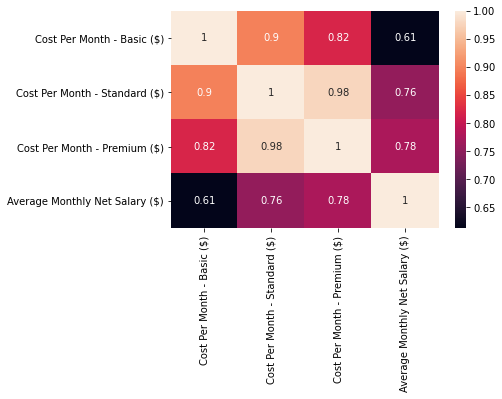

In [26]:
sn.heatmap(data.corr(), annot=True)

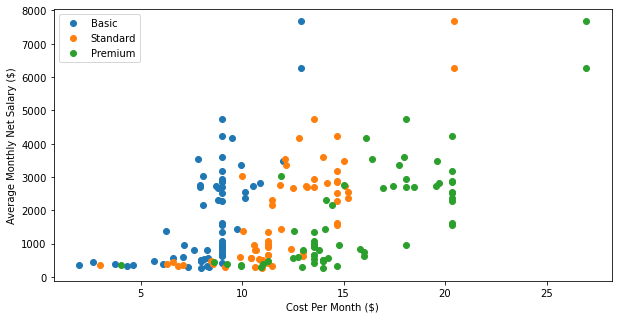

In [27]:
plt.figure(figsize=(10, 5))
plt.xlabel('Cost Per Month ($)')
plt.ylabel('Average Monthly Net Salary ($)')
plt.scatter(data['Cost Per Month - Basic ($)'], data['Average Monthly Net Salary ($)'], label='Basic')
plt.scatter(data['Cost Per Month - Standard ($)'], data['Average Monthly Net Salary ($)'], label='Standard')
plt.scatter(data['Cost Per Month - Premium ($)'], data['Average Monthly Net Salary ($)'], label='Premium')
plt.legend()
plt.show()

## Стоимость подписки относительно среднего дохода (базовая, стандартная, премиум) в Чехии

In [28]:
average_salary_czech = data[data['Country'] == 'Czechia']['Average Monthly Net Salary ($)']
average_salary_czech = average_salary_czech[average_salary_czech.index.values[0]] #средняя зп в Чехии

In [29]:
average_salary_czech

2313.0

In [30]:
czech_data = data[data['Country'] == 'Czechia']
columns = ['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)', 'Average Monthly Net Salary ($)']

In [31]:
czech_data[columns]

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Average Monthly Net Salary ($)
8,8.83,11.49,14.15,2313.0


In [32]:
relative_subscription_cost = czech_data.apply(lambda column_series: column_series.apply(lambda column_value: column_value / 
                                                                                        average_salary_czech
                                                                            if column_series.name in columns else column_value
                                                                                       )
                                             )

In [33]:
relative_subscription_cost.columns = ['Country', 'Basic cost relative to average', 'Standard cost relative to average', 'Premium cost relative to average', 'avg']

In [34]:
relative_subscription_cost

,Country,Basic cost relative to average,Standard cost relative to average,Premium cost relative to average,avg
8,Czechia,0.003818,0.004968,0.006118,1.0


## Топ-5 стран, которые имеют самую большую доступную коллекцию сериалов

In [36]:
df.sort_values(by='Total Library Size', ascending=False, ignore_index=True).head(5)[['Country', 'Total Library Size']]

,Country,Total Library Size
0,Czechia,7325
1,Slovakia,7035
2,Hungary,6884
3,Bulgaria,6797
4,United Kingdom,6643


## Какой процент среднего дохода россиянина будет составлять подписка Netflix?

In [37]:
russia_data = data[data['Country'] == 'Russia']
russia_avg_salary = data[data['Country'] == 'Russia']['Average Monthly Net Salary ($)']
russia_avg_salary = russia_avg_salary[russia_avg_salary.index.values[0]]
c = russia_data.apply(lambda column_series: column_series.apply(lambda column_value: column_value / russia_avg_salary * 100
                                                  if column_series.name in columns else column_value
                                                 ))
c.columns = ['Country', 'Basic cost relative to average %', 'Standard cost relative to average %', 'Premium cost relative to average %', 'avg']
c

,Country,Basic cost relative to average %,Standard cost relative to average %,Premium cost relative to average %,avg
34,Russia,1.500803,2.001071,2.503184,100.0


## Место России, если отсортировать страны по эффективности подписки (Cost Per Title)

In [39]:
cost_per_title = data[['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']].mean(axis=1) / \
df['Total Library Size']

In [40]:
cost_per_title

0     0.001352
1     0.002602
2     0.002202
3     0.001661
4     0.001984
        ...   
60    0.002262
61    0.003651
62    0.001982
63    0.003411
64    0.002347
Length: 65, dtype: float64

In [41]:
data['Cost Per Title'] = cost_per_title

In [43]:
data_sort_cost_per_title = data.sort_values('Cost Per Title', ignore_index=True)['Country']
data_sort_cost_per_title[data_sort_cost_per_title=='Russia']

18    Russia
Name: Country, dtype: object

## В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [38]:
min_price_cost = data['Cost Per Month - Basic ($)'].min()
data[data['Cost Per Month - Basic ($)'] == min_price_cost]

,Country,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Average Monthly Net Salary ($)
41,Turkey,1.97,3.0,4.02,366.55
